# 1. Data Cleaning and Preparation

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
df=pd.read_csv('sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [36]:
df.shape

(450, 13)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [38]:
df.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [39]:
df.isnull().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [40]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [41]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [42]:
df.mean(numeric_only=True)

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [43]:
df.median(numeric_only=True)

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [44]:
df.std(numeric_only=True)

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

In [45]:
df['BU'].mode()

0         FMCG
1    Lifestyle
2      Mobiles
Name: BU, dtype: object

In [46]:
df['Brand'].mode()

0    Jeera
Name: Brand, dtype: object

In [47]:
df['Model'].mode()

0       Babaji Cream
1        Babaji Oil 
2     Babaji Shampoo
3      Gear BB Cream
4         Gear Cream
5           Gear Oil
6       Gear Shampoo
7          M- Inners
8        M- T Shirts
9          M-Casuals
10         M-Formals
11           M-Jeans
12           M-Shoes
13              O-10
14              O-11
15             RU-10
16              RU-9
17         RU-9 Plus
18              S-20
19              S-21
20       Vedic Cream
21         Vedic Oil
22     Vedic Shampoo
23         W-Casuals
24          W-Inners
25          W-Lounge
26         W-Western
27            YM-98 
28             YM-99
29        YM-99 Plus
Name: Model, dtype: object

In [48]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


# 2. Visualization

In [49]:
df.hist()
plt.tight_layout()

In [50]:
sns.boxplot(df['Volume'])

<Axes: title={'center': 'Net Sales Value'}, ylabel='Volume'>

In [51]:
sns.boxplot(df['Avg Price'])


<Axes: title={'center': 'Net Sales Value'}, ylabel='Volume'>

In [52]:
sns.boxplot(df['Total Sales Value'])

<Axes: title={'center': 'Net Sales Value'}, ylabel='Volume'>

In [53]:
sns.boxplot(df['Discount Rate (%)'])

<Axes: title={'center': 'Net Sales Value'}, ylabel='Volume'>

In [54]:
sns.boxplot(df['Discount Amount'])

<Axes: title={'center': 'Net Sales Value'}, ylabel='Volume'>

In [55]:
sns.boxplot(df['Net Sales Value'])

<Axes: title={'center': 'Net Sales Value'}, ylabel='Volume'>

In [56]:
plt.figure(figsize=(15,5))
sns.barplot(df)
plt.tight_layout()

In [57]:
sns.barplot(df['BU'],palette='viridis')
plt.tight_layout()

C:\Users\Hi\AppData\Local\Temp\ipykernel_4056\3533259607.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['BU'],palette='viridis')


In [58]:
f, ax = plt.subplots(figsize=(10,8))
sns.barplot(df['Brand'],palette='viridis')
plt.tight_layout()

C:\Users\Hi\AppData\Local\Temp\ipykernel_4056\4200769004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['Brand'],palette='viridis')


In [59]:
sns.barplot(df['Model'],palette='viridis')
plt.tight_layout()

C:\Users\Hi\AppData\Local\Temp\ipykernel_4056\2105154802.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['Model'],palette='viridis')


# 3. Standardization of Numerical Variables

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
df_drop = df.drop(columns=['Model', 'BU', 'Date', 'SKU', 'Day', 'Brand','City'])

In [62]:
sc=StandardScaler()

In [63]:
x=sc.fit_transform(df_drop)
x

array([[ 2.35002911,  0.091173  ,  2.92572115, -0.83028851,  3.95281631,
         2.80475594],
       [ 1.16712855, -0.01957016,  1.33099521, -0.85266145,  1.84901409,
         1.2710262 ],
       [ 0.45738822,  0.31265934,  1.56277525, -1.35163138,  1.62299458,
         1.54567497],
       ...,
       [-0.72551234, -0.49022863, -0.60644824,  0.90379261, -0.60813967,
        -0.60192115],
       [-0.48893223, -0.47361715, -0.55692259,  0.38847428, -0.53037877,
        -0.55549857],
       [-0.96209245, -0.40717125, -0.60842926,  0.04223476, -0.63734468,
        -0.60123949]])

In [64]:
data=pd.DataFrame(x,columns=df_drop.columns)
data

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


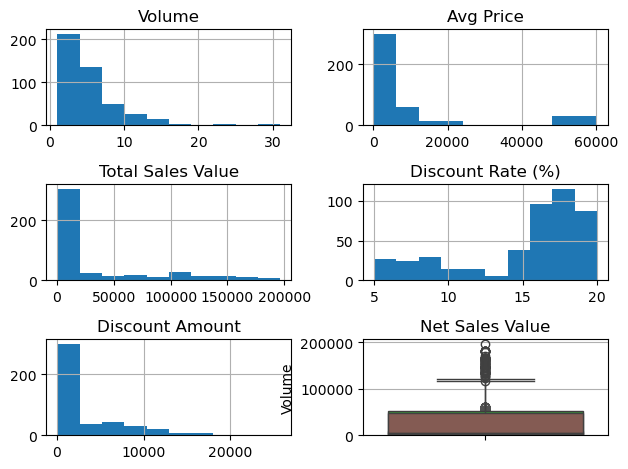

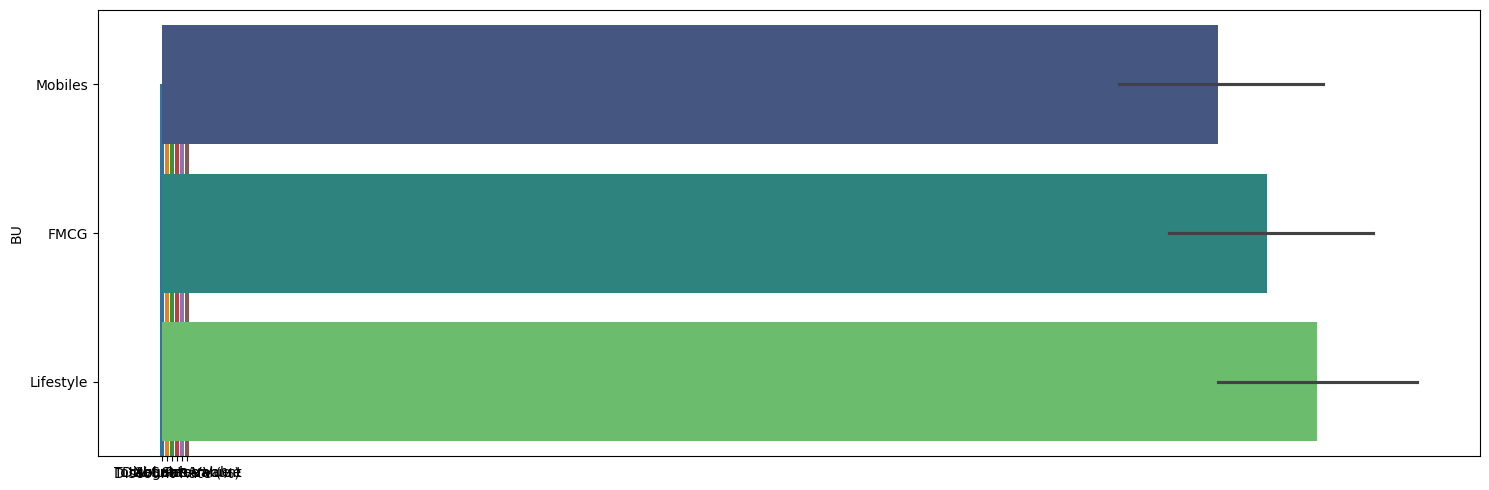

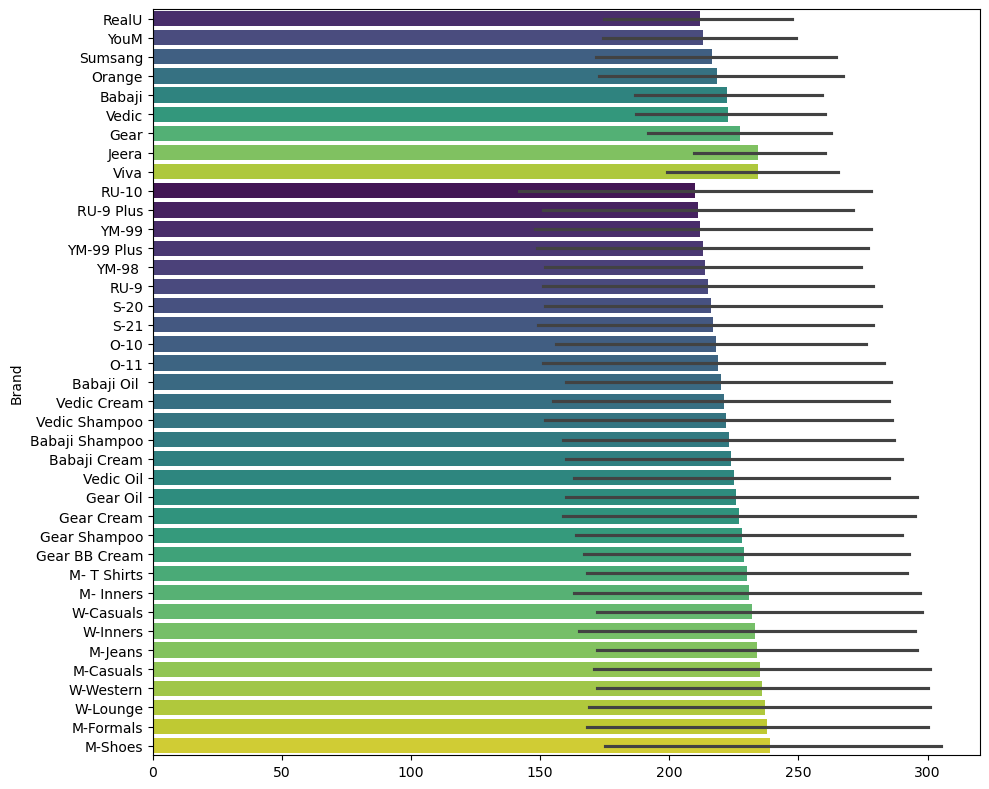

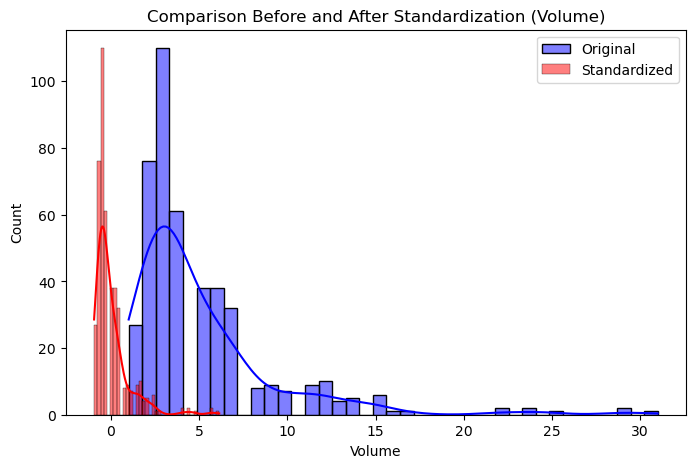

In [65]:
# Visualize a column before and after standardization
sample_column = numerical_columns[0]  # Take the first numerical column as an example
plt.figure(figsize=(8, 5))
sns.histplot(df[sample_column], kde=True, color='blue', label='Original')
sns.histplot(data[sample_column], kde=True, color='red', label='Standardized')
plt.title(f"Comparison Before and After Standardization ({sample_column})")
plt.legend()
plt.show()

# 4. Conversion of Categorical Data into Dummy Variables

In [66]:
# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [67]:
# Display the transformed dataset
print("\nDataset After One-Hot Encoding:")
print(data_encoded.head())


Dataset After One-Hot Encoding:
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Ved

In [68]:
# Shape of the dataset before and after encoding
print(f"\nShape Before Encoding: {df.shape}")
print(f"Shape After Encoding: {data_encoded.shape}")


Shape Before Encoding: (450, 13)
Shape After Encoding: (450, 94)
